In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Attributes:__

__age :__ age of customer (numeric)
__job :__ type of job (categorical)
__marital :__ marital status (categorical)
__education (categorical)__
__default:__ has credit in default? (binary)
__balance:__ average yearly balance, in euros (numeric)
__housing:__ has a housing loan? (binary)
__loan:__ has personal loan? (binary)
__contact:__ contact communication type (categorical)
__day:__ last contact day of the month (numeric)
__month:__ last contact month of year (categorical)
__duration:__ last contact duration, in seconds (numeric)
__campaign:__ number of contacts performed during this campaign and for this client (numeric, includes last contact)
__Output (desired target):__

__y__ - has the client subscribed to a term deposit? (binary)

# 1. Importing Data From csv File

In [2]:
term_deposit_marketing = pd.read_csv('Data/term-deposit-marketing-2020.csv')

In [3]:
term_deposit_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
term_deposit_marketing.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [5]:
term_deposit_marketing.shape

(40000, 14)

In [6]:
term_deposit_marketing[['age', 'balance', 'day', 'duration', 'campaign']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [78]:
term_deposit_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [7]:
tdm_df = term_deposit_marketing.copy()

# 2. Explatory Data Analysis

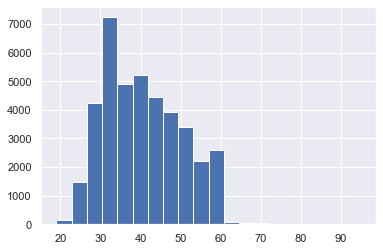

In [8]:
#Distribution of age
sns.set()
plt.hist(tdm_df['age'], bins = 20);

In [9]:
tdm_df['age'].value_counts()

32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
94       1
86       1
90       1
81       1
95       1
Name: age, Length: 70, dtype: int64

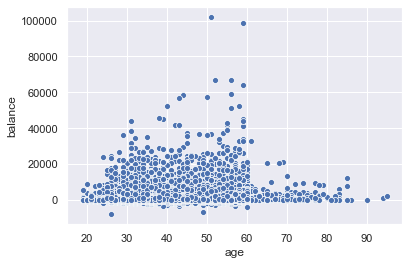

In [10]:
#Distribution of balance depending on age
sns.scatterplot(x = 'age', y = 'balance', data = tdm_df);

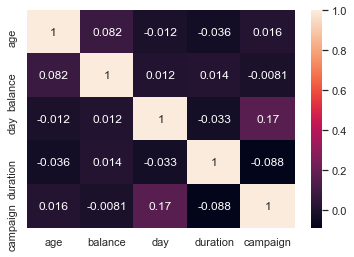

In [11]:
#Correlation between the numerical attributes
sns.heatmap(tdm_df.corr(), annot = True);

c:\users\asus\credit_risk\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


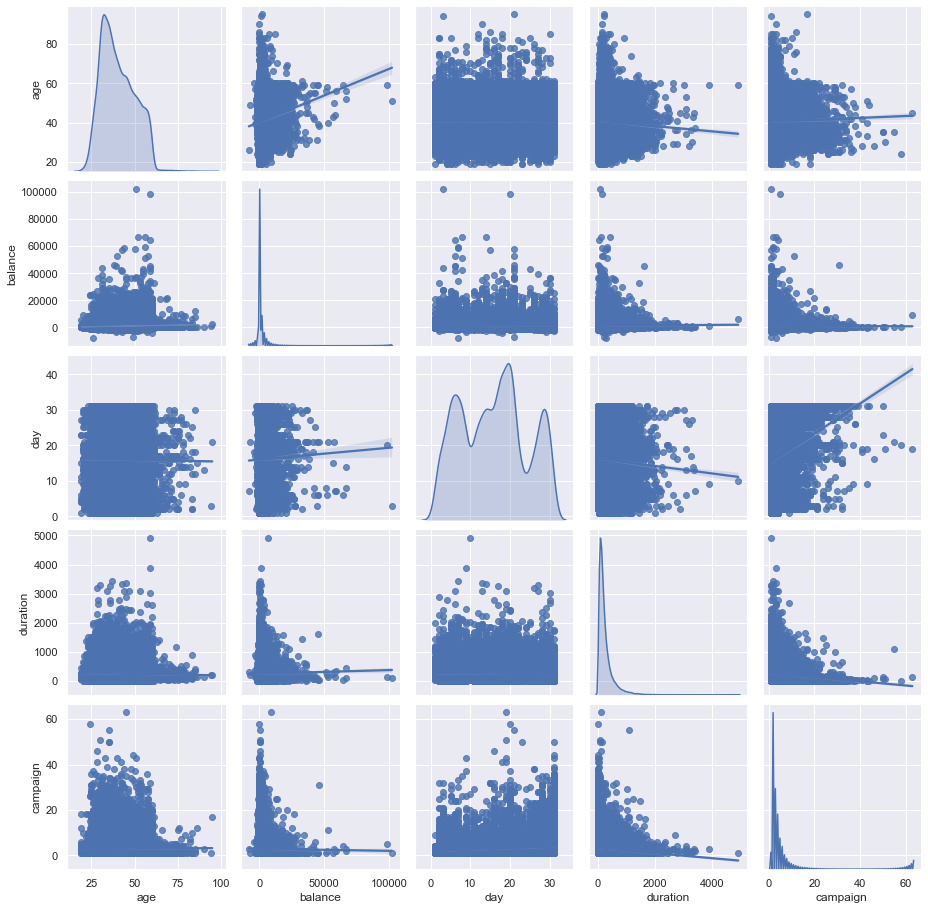

In [12]:
sns.pairplot(tdm_df, kind = 'reg', diag_kind = 'kde');

In [13]:
#Checking if there are any missing values in dataframe
tdm_df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

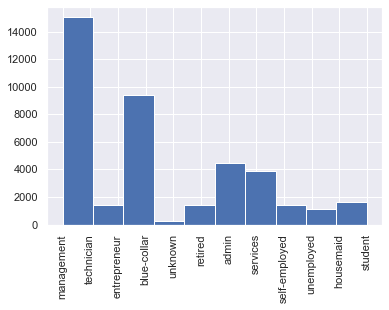

In [14]:
plt.hist(tdm_df['job'])
plt.xticks(rotation = 'vertical');

In [15]:
tdm_df['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

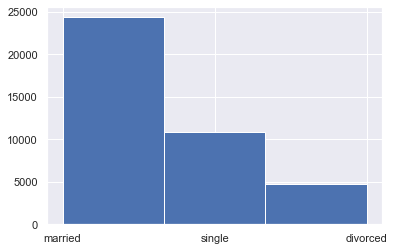

In [16]:
plt.hist(tdm_df['marital'], bins = 3);

In [17]:
tdm_df['marital'].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

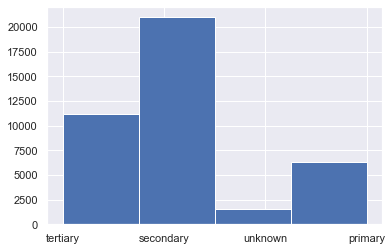

In [18]:
plt.hist(tdm_df['education'], bins = 4);

In [19]:
tdm_df['education'].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

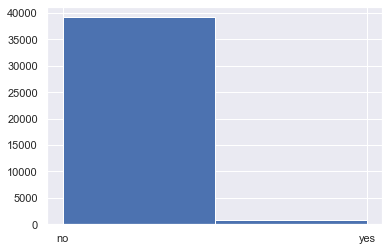

In [20]:
plt.hist(tdm_df['default'], bins = 2);

In [21]:
tdm_df['default'].value_counts()

no     39191
yes      809
Name: default, dtype: int64

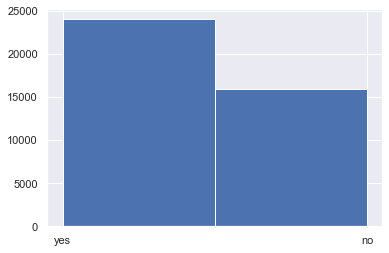

In [22]:
plt.hist(tdm_df['housing'], bins = 2);

In [23]:
tdm_df['housing'].value_counts()

yes    24031
no     15969
Name: housing, dtype: int64

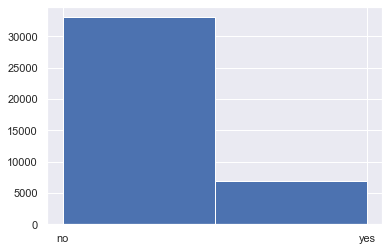

In [24]:
plt.hist(tdm_df['loan'], bins = 2);

In [25]:
tdm_df['loan'].value_counts()

no     33070
yes     6930
Name: loan, dtype: int64

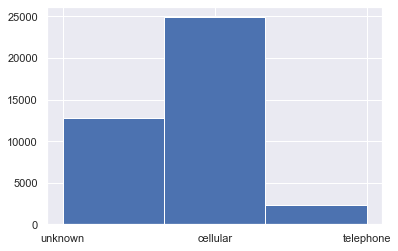

In [26]:
plt.hist(tdm_df['contact'], bins = 3);

In [27]:
tdm_df['contact'].value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

# 3. Preprocessing Data

## 3.1. Outlier Detection

In [28]:
Q1 = tdm_df['age'].quantile(0.25)
Q3 = tdm_df['age'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - 1.5 * IQR
top_limit = Q3 + 1.5 * IQR

In [29]:
print(bottom_limit)
print(top_limit)

10.5
70.5


In [30]:
outliers = (tdm_df['age'] > top_limit)

In [31]:
age_outliers = tdm_df['age']

In [32]:
age_outliers[outliers]

29158    83
29261    75
29263    75
29322    83
29865    75
         ..
33815    71
33827    72
33846    77
33860    73
34128    85
Name: age, Length: 79, dtype: int64

In [33]:
age_outliers[outliers] = top_limit

<ipython-input-33-01eb39522c23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_outliers[outliers] = top_limit


In [34]:
age_outliers[outliers]

29158    70.5
29261    70.5
29263    70.5
29322    70.5
29865    70.5
         ... 
33815    70.5
33827    70.5
33846    70.5
33860    70.5
34128    70.5
Name: age, Length: 79, dtype: float64

In [35]:
Q1 = tdm_df['balance'].quantile(0.25)
Q3 = tdm_df['balance'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - 1.5 * IQR
top_limit = Q3 + 1.5 * IQR

In [36]:
print(bottom_limit)
print(top_limit)

-1843.5
3216.5


In [37]:
outliers = ((tdm_df['balance'] < bottom_limit) | (tdm_df['balance'] > top_limit))

In [38]:
balance_outliers = tdm_df['balance']

In [39]:
balance_outliers[outliers]

34        10635
65         6530
69        12223
70         5935
186        4384
          ...  
39971      4545
39977      7222
39983      3402
39989    102127
39996      3340
Name: balance, Length: 4280, dtype: int64

In [40]:
top_outliers = (tdm_df['balance'] > top_limit)

In [41]:
balance_outliers[top_outliers] = top_limit

<ipython-input-41-a3ec87ab502e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_outliers[top_outliers] = top_limit


In [42]:
bottom_outliers = (tdm_df['balance'] < bottom_limit)

In [43]:
balance_outliers[bottom_outliers] = bottom_limit

In [44]:
balance_outliers[outliers]

34       3216.5
65       3216.5
69       3216.5
70       3216.5
186      3216.5
          ...  
39971    3216.5
39977    3216.5
39983    3216.5
39989    3216.5
39996    3216.5
Name: balance, Length: 4280, dtype: float64

In [45]:
tdm_df[['age', 'balance', 'day', 'duration', 'campaign']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.532337,9.596776,19.0,33.0,39.0,48.0,70.5
balance,40000.0,855.678150,1102.283256,-1843.5,54.0,407.0,1319.0,3216.5
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


## 3.2. Preprocessing Categorical Values

In [46]:
tdm_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,no


In [47]:
categorical_dummies = [pd.get_dummies(tdm_df['job'], prefix = 'job', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['marital'], prefix = 'marital', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['education'], prefix = 'education', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['default'], prefix = 'default', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['housing'], prefix = 'housing', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['loan'], prefix = 'loan', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['contact'], prefix = 'contact', prefix_sep = ':'), 
                      pd.get_dummies(tdm_df['y'], prefix = 'y', prefix_sep = ':')]

In [48]:
dummies_df = pd.concat(categorical_dummies, axis = 1)

In [49]:
dummies_df.head()

,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,...,default:yes,housing:no,housing:yes,loan:no,loan:yes,contact:cellular,contact:telephone,contact:unknown,y:no,y:yes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0


In [50]:
numerical_df = tdm_df[['age', 'balance', 'duration', 'campaign']]
numerical_df.head()

,age,balance,duration,campaign
0,58.0,2143.0,261,1
1,44.0,29.0,151,1
2,33.0,2.0,76,1
3,47.0,1506.0,92,1
4,33.0,1.0,198,1


In [51]:
features_df = pd.concat([numerical_df, dummies_df], axis = 1)
features_df.head()

,age,balance,duration,campaign,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,...,default:yes,housing:no,housing:yes,loan:no,loan:yes,contact:cellular,contact:telephone,contact:unknown,y:no,y:yes
0,58.0,2143.0,261,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
1,44.0,29.0,151,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,33.0,2.0,76,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,47.0,1506.0,92,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
4,33.0,1.0,198,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0


In [52]:
dummies_df.columns

Index(['job:admin', 'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed', 'job:services',
       'job:student', 'job:technician', 'job:unemployed', 'job:unknown',
       'marital:divorced', 'marital:married', 'marital:single',
       'education:primary', 'education:secondary', 'education:tertiary',
       'education:unknown', 'default:no', 'default:yes', 'housing:no',
       'housing:yes', 'loan:no', 'loan:yes', 'contact:cellular',
       'contact:telephone', 'contact:unknown', 'y:no', 'y:yes'],
      dtype='object')

In [53]:
#There must be (n-1) dummy variables for n categorical features
features_df.drop(['job:unknown', 'marital:divorced', 'education:unknown', 'default:no', 'housing:no', 'loan:no', 
                'contact:unknown', 'y:no'], axis = 1, inplace = True)

In [54]:
features_df.head()

,age,balance,duration,campaign,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,...,marital:single,education:primary,education:secondary,education:tertiary,default:yes,housing:yes,loan:yes,contact:cellular,contact:telephone,y:yes
0,58.0,2143.0,261,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,44.0,29.0,151,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,33.0,2.0,76,1,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,47.0,1506.0,92,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33.0,1.0,198,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 3.3. Standardization of Numerical Values

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
age = features_df[['age']].values
balance = features_df[['balance']].values
duration = features_df[['duration']].values.astype(float)

In [58]:
#In our features_df, we have dummy variables which are 0's and 1's and numerical values like 'age', 'balance' and 'duration'
#And these values are not in the same scale so we need to standardize our numerical values to get more accurate results
standard_scaler = StandardScaler()
age_scaled = standard_scaler.fit_transform(age)
balance_scaled = standard_scaler.fit_transform(balance)
duration_scaled = standard_scaler.fit_transform(duration)

In [59]:
features_df['age_scaled'] = pd.DataFrame(age_scaled)
features_df['balance_scaled'] = pd.DataFrame(balance_scaled)
features_df['duration_scaled'] = pd.DataFrame(duration_scaled)

In [60]:
features_df.drop(['age', 'balance', 'duration', 'contact:cellular',
                'contact:telephone'], axis = 1, inplace = True)

In [61]:
features_df.head()

,campaign,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,...,education:primary,education:secondary,education:tertiary,default:yes,housing:yes,loan:yes,y:yes,age_scaled,balance_scaled,duration_scaled
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1.820182,1.167883,0.023811
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.361341,-0.749978,-0.400305
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,-0.784892,-0.774473,-0.689474
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.673950,0.589984,-0.627785
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.784892,-0.775380,-0.219092


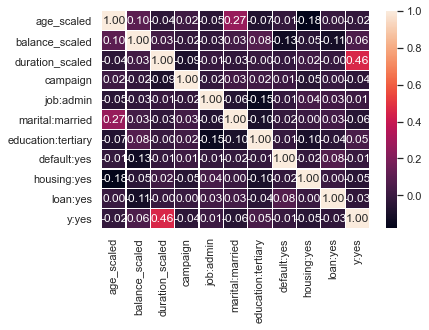

In [81]:
#Correlation between all final features that are going to be used in the model
#As we can see from the Correlation heatmap, there is a low positive correlation between 'duration' and our dependent variable 'y'
#And this correlation is the highest correlation we got among all features so we definitely have to use 'duration' feature in our model
sns.heatmap(features_df[['age_scaled', 'balance_scaled', 'duration_scaled', 'campaign', 'job:admin', 'marital:married', 'education:tertiary', 
                         'default:yes', 'housing:yes', 'loan:yes', 'y:yes']].corr(), annot = True, fmt = '.2f', linewidths = .2);

# 4. Logistic Regression Model

In this project, our dependent variable is a categorical variable, so we are going to use a Logistic Regression model to 
make our predictions. We need to use Logistic Regression model when we have a dependent variable with only 2 outcomes like in this example, Yes or No.

## 4.1. Importing Libraries

In [63]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

## 4.2. Train-Test Split

In [64]:
X = features_df.drop('y:yes', axis = 1)
y = features_df['y:yes']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## 4.3. Model

In [66]:
logistic_model = LogisticRegressionCV(cv = 5, random_state = 123).fit(X_train, y_train)

In [67]:
y_pred = logistic_model.predict(X_test)

In [68]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7356,99
1,419,126


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7455
           1       0.56      0.23      0.33       545

    accuracy                           0.94      8000
   macro avg       0.75      0.61      0.65      8000
weighted avg       0.92      0.94      0.92      8000



## 4.4. ROC Curve and Area Under Curve Score

In [70]:
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

In [71]:
false_positive, true_positive, tresh = roc_curve(y_test, y_pred_prob)

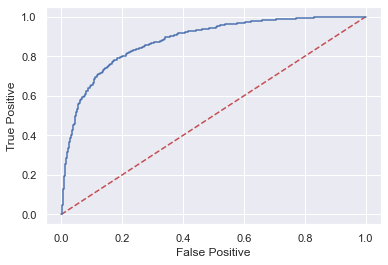

In [72]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive, true_positive)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

In [73]:
roc_auc_score(y_test, y_pred)

0.6089564912410242

## 4.5. Cross Validation Score

In [76]:
print(cross_val_score(logistic_model, X_train, y_train, cv = 5, scoring = 'accuracy'))

[0.9315625  0.9325     0.92921875 0.93546875 0.93296875]


In [75]:
#Our model can predict correctly 93% of the given data
print(cross_val_score(logistic_model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())

0.9323437499999999
